# ¡Hola Edgar! 😊

Mi nombre es **Alejandro Castellanos** y hoy tengo el placer de ser el revisor de tu proyecto.

Voy a revisar todo tu código con detalle, buscando tanto los puntos fuertes como aquellos en los que podrías mejorar. Te dejaré comentarios a lo largo del notebook, destacando lo que has hecho bien y sugiriendo ajustes donde sea necesario. Si encuentro algún error, no te preocupes, te lo haré saber de forma clara y te daré información útil para que puedas corregirlo en la próxima iteración. Si en algún punto tienes comentarios, siéntete libre de dejarlos también.


Encontrarás mis comentarios específicos dentro de cajas verdes, amarillas o rojas, es muy importante que no muevas, modifiques o borres mis comentarios, con el fin de tener un seguimiento adecuado de tu proceso:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

A continuación te dejaré un comentario general con mi valoración del proyecto. **¡Mi objetivo es que sigas aprendiendo y mejorando con cada paso!**


-----

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Edgar gran trabajo completando este proyecto. Has demostrado habilidades avanzadas en análisis de información, integración y manejo de múltiples datasets, así como un uso efectivo de visualizaciones que enriquecen la presentación de los hallazgos, haciendo que los datos sean claros y fáciles de interpretar. 

En el apartado de las pruebas de hipótesis aunque, de manera general, la implementación es correcta, para futuros análisis te recomiendo incluir una etapa previa con la prueba de Levene con el fin de verificar la igualdad de varianzas, lo cual contribuye a asegurar la validez estadística de los resultados.

Este proyecto refleja tu dominio en procesamiento y visualización de datos, y tu capacidad para obtener conclusiones relevantes que aportan valor a la toma de decisiones. Lograste un equilibrio excelente entre habilidades técnicas, analíticas y estratégicas.

Éxitos en tu próximo Sprint 🚀

*Estado del Proyecto:* **Aprobado**

</div>

------

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

**Plan de solución**

Primero tenemos que leer los datos y analizar cada DataFrame para ver posibles oportunidades y despues si es necesario limpiar los datos para tener una buena interpretacion de los resultados.

Despues pasamos al analisis de los resultados obtenidos para poder plantear nuestra hipotesis y por ultimo probar dicha hipotesis para poder tomar una decision asertiva.

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
from scipy import stats as st





## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
users = pd.read_csv("/datasets/megaline_users.csv")
calls = pd.read_csv("/datasets/megaline_calls.csv")
messages = pd.read_csv("/datasets/megaline_messages.csv")
internet = pd.read_csv("/datasets/megaline_internet.csv")
plans = pd.read_csv("/datasets/megaline_plans.csv")



## Preparar los datos

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas
plans


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Para el DataFrame de tarifas los datos estan correctos, no hay datos ausentes y cada columna tiene su tipo de datos correctos.

Lo unico que yo haria seria cambiar la columna de [plan_name] para al inicio y no al final.

## Corregir datos

No hay datos que corregir

## Enriquecer los datos

In [5]:
#cambiar la columna plan_name para al inicio
plans = plans.reindex(columns=["plan_name", "messages_included", "mb_per_month_included", "minutes_included", "usd_monthly_pay", "usd_per_gb","usd_per_message","usd_per_minute"])


## Usuarios/as

In [6]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
# Imprime una muestra de datos para usuarios
users.sample(10)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
477,1477,Magaly,Rivas,52,"Riverside-San Bernardino-Ontario, CA MSA",2018-08-24,ultimate,NaN
309,1309,Winfred,Zimmerman,19,"San Diego-Chula Vista-Carlsbad, CA MSA",2018-07-04,surf,NaN
124,1124,Jenell,Navarro,48,"New Haven-Milford, CT MSA",2018-02-19,ultimate,NaN
440,1440,France,Barrett,49,"Nashville-Davidson–Murfreesboro–Franklin, TN MSA",2018-04-16,surf,NaN
401,1401,Charmain,Bryant,67,"Richmond, VA MSA",2018-08-24,ultimate,NaN
221,1221,Mckenzie,Wilkinson,18,"Boston-Cambridge-Newton, MA-NH MSA",2018-12-17,surf,NaN
257,1257,Gabriel,O'donnell,61,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-01-29,surf,NaN
151,1151,Ralph,Monroe,21,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-03-20,surf,NaN
27,1027,Georgeanna,Cardenas,38,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-26,surf,NaN
410,1410,Wendell,Lloyd,46,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-10-06,surf,NaN


A primera vista se puede notar que la mayoria de los datos en la columna [churn_date] estan ausentes pero esto es porque la tarifa se estaba usando cuando fue extraída esta base de datos, asi que asi lo dejamos.

Lo que si se tiene que cambiar es el tipo de datos de las columnas [user_id] a tipo de dato object y las columnas [reg_date] y [churn_date] a tipo de dato datetime64[ns].

### Corregir los datos

In [8]:
users["user_id"]= users["user_id"].astype(str) # Cambio de tipo de datos a object
users["reg_date"] = pd.to_datetime(users["reg_date"]) # Cambio de tipo de datos a datetime64[ns]
users["churn_date"] = pd.to_datetime(users["churn_date"]) # Cambio de tipo de datos a datetime64[ns]

## Llamadas

In [9]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [10]:
# Imprime una muestra de datos para las llamadas
calls.sample(10)


,id,user_id,call_date,duration
25478,1098_153,1098,2018-09-04,3.45
101424,1362_169,1362,2018-12-11,18.16
12009,1053_52,1053,2018-11-02,8.49
126595,1450_89,1450,2018-12-02,17.22
121551,1427_219,1427,2018-05-19,11.48
25704,1099_22,1099,2018-12-15,0.00
11569,1050_344,1050,2018-04-05,0.00
89703,1326_354,1326,2018-08-10,10.28
83978,1305_466,1305,2018-12-12,6.46
13761,1058_368,1058,2018-11-26,2.82


En este DataFrame no hay datos ausentes pero si tipo de datos no adecuados en las columnas [user_id] y [call_date], tambien a simple vista pudieramos pensar que podria haber datos duplicados por la gran cantidad de datos que hay pero verificando los datos duplicados por cada columna solamente hay duplicados en la columna [user_id] que es totalmente normal ya que un usuario puede hacer muchas llamadas.

Tambien pudieramos enriquecer los datos añadiendo la columna de [first_name] y [last_name] a cada llamada. 

### Corregir los datos

In [11]:
calls["user_id"]= calls["user_id"].astype(str) # Cambio de tipo de datos a object
calls["call_date"] = pd.to_datetime(calls["call_date"]) # Cambio de tipo de datos a datetime64[ns]

### Enriquecer los datos

In [12]:
# Se agrega las columnas first_name y last_name al DataFrame calls
columns= ["id","user_id","call_date","duration","first_name","last_name"]
calls= calls.merge(users, on="user_id",how="left")[columns]

## Mensajes

In [13]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [14]:
# Imprime una muestra de datos para los mensajes
messages.sample(10)


,id,user_id,message_date
49195,1328_153,1328,2018-09-06
2120,1028_25,1028,2018-02-23
11394,1077_665,1077,2018-10-05
42482,1279_15,1279,2018-11-29
16010,1105_209,1105,2018-11-24
30214,1189_113,1189,2018-09-25
14269,1098_288,1098,2018-11-27
73494,1472_23,1472,2018-07-08
24200,1145_55,1145,2018-12-02
6061,1055_179,1055,2018-09-27


Mismo caso del DataFrame calls, hay datos duplicados en la columna [user_id] pero esto es normal ya que un usuario puede mandar varios mensajes. En este DataFrame no hay datos ausentes pero si hay tipo de datos no adecuados en las columnas [user_id] y [message_date].

Tambien pudieramos enriquecer los datos añadiendo la columna de [first_name] y [last_name] a cada mensaje.

### Corregir los datos

In [15]:
messages["user_id"]= messages["user_id"].astype(str) # Cambio de tipo de datos a object
messages["message_date"] = pd.to_datetime(messages["message_date"]) # Cambio de tipo de datos a datetime64[ns]

### Enriquecer los datos

In [16]:
# Se agrega las columnas first_name y last_name al DataFrame messages
columns= ["id","user_id","message_date","first_name","last_name"]
messages= messages.merge(users, on="user_id",how="left")[columns]

## Internet

In [17]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [18]:
# Imprime una muestra de datos para el tráfico de internet
internet.sample(10)


,id,user_id,session_date,mb_used
89938,1415_42,1415,2018-11-26,1324.20
90570,1417_159,1417,2018-11-03,671.93
266,1002_69,1002,2018-10-27,185.18
16660,1075_93,1075,2018-10-04,502.61
57130,1258_45,1258,2018-11-10,486.07
88229,1407_8,1407,2018-12-19,354.32
76316,1358_552,1358,2018-06-07,60.21
31049,1141_454,1141,2018-08-19,174.64
1343,1008_54,1008,2018-10-19,429.88
80475,1376_28,1376,2018-11-12,0.00


Hay datos duplicados en la columna [user_id] pero esto es normal ya que un usuario puede usar sus datos en diferentes dias. En este DataFrame no hay datos ausentes pero si hay tipo de datos no adecuados en las columnas [user_id] y [session_date].

Tambien pudieramos enriquecer los datos añadiendo la columna de [first_name] y [last_name] a cada usuario.

### Corregir los datos

In [19]:
internet["user_id"]= internet["user_id"].astype(str) # Cambio de tipo de datos a object
internet["session_date"] = pd.to_datetime(internet["session_date"]) # Cambio de tipo de datos a datetime64[ns]

### Enriquecer los datos

In [20]:
# Se agrega las columnas first_name y last_name al DataFrame internet
columns= ["id","user_id","first_name","last_name","session_date","mb_used"]
internet= internet.merge(users, on="user_id",how="left")[columns]

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Excelente trabajo en el análisis preliminar de los datasets. Usaste correctamente las funciones `info` y `sample` para revisar la estructura y el contenido de los datos, lo que te permitió realizar los ajustes necesarios. Esto facilitará el análisis de los datos y el desarrollo de las demás etapas del proyecto.


</div>

## Estudiar las condiciones de las tarifas

In [21]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
# 1GB=1024 megabytes
plans


,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,surf,50,15360,500,20,10,0.03,0.03
1,ultimate,1000,30720,3000,70,7,0.01,0.01


## Agregar datos por usuario


In [22]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

#Agrupe cada usuario y mes por llamada y cambie de nombre la columna duration por calls
llamadas_por_usuario= calls.groupby(["user_id","call_date"])["duration"].count() 
llamadas_por_usuario= llamadas_por_usuario.reset_index() # reinicie los indices
llamadas_por_usuario= llamadas_por_usuario.rename(columns={"duration":"calls"})
# Aqui extraje el numero del mes en el que se hizo la llamada
llamadas_por_usuario["month"]= llamadas_por_usuario["call_date"].dt.month 
 #Agrupe los usuarios mostrando el mes que se realizo la llamada y su cantidad de llamadas
llamadas_por_usuario= llamadas_por_usuario.groupby(["user_id","month"])["calls"].sum()
llamadas_por_usuario= llamadas_por_usuario.reset_index() # reinicie los indices

llamadas_por_usuario


,user_id,month,calls
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [23]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

#Agrupe cada usuario y mes por la cantidad de minutos y cambie de nombre la columna duration por minutes
minutos_por_usuario= calls.groupby(["user_id","call_date"])["duration"].sum() 
minutos_por_usuario= minutos_por_usuario.reset_index() # reinicie los indices
minutos_por_usuario= minutos_por_usuario.rename(columns={"duration":"minutes"}) 
# Aqui extraje el numero del mes en el que se hizo la llamada
minutos_por_usuario["month"]= minutos_por_usuario["call_date"].dt.month 
#Agrupe los usuarios mostrando el mes que se realizo la llamada y su cantidad de minutos
minutos_por_usuario= minutos_por_usuario.groupby(["user_id","month"])["minutes"].sum()
minutos_por_usuario= minutos_por_usuario.reset_index()# reinicie los indices

minutos_por_usuario

,user_id,month,minutes
0,1000,12,116.83
1,1001,8,171.14
2,1001,9,297.69
3,1001,10,374.11
4,1001,11,404.59
...,...,...,...
2253,1498,12,324.77
2254,1499,9,330.37
2255,1499,10,363.28
2256,1499,11,288.56


In [24]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

#Agrupe cada usuario y mes por mensaje y cambie de nombre la columna first_name por messages
mensajes_por_usuario= messages.groupby(["user_id","message_date"])["first_name"].count()
mensajes_por_usuario= mensajes_por_usuario.reset_index() # Reinicie los indices
mensajes_por_usuario= mensajes_por_usuario.rename(columns={"first_name":"messages"})
# Aqui extraje el numero del mes en el que se mando el mensaje
mensajes_por_usuario["month"]= mensajes_por_usuario["message_date"].dt.month
#Agrupe los usuarios mostrando el mes que se mando el mensaje y la cantidad de mensajes
mensajes_por_usuario= mensajes_por_usuario.groupby(["user_id","month"])["messages"].sum()
mensajes_por_usuario= mensajes_por_usuario.reset_index()

mensajes_por_usuario

,user_id,month,messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [25]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

#Agrupe cada usuario y mes por Internet usado
internet_por_usuario= internet.groupby(["user_id","session_date"])["mb_used"].sum()
internet_por_usuario= internet_por_usuario.reset_index() #Reinicio los indices
# Aqui extraje el numero del mes en el que se uso el Internet
internet_por_usuario["month"]= internet_por_usuario["session_date"].dt.month
#Agrupe los usuarios mostrando el mes en el que se uso el Internet y su cantidad de datos usados
internet_por_usuario= internet_por_usuario.groupby(["user_id","month"])["mb_used"].sum()
internet_por_usuario= internet_por_usuario.reset_index()

internet_por_usuario


,user_id,month,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83


**DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.**

In [26]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

usuario_consumo= llamadas_por_usuario.merge(minutos_por_usuario, on=["user_id","month"], how="outer")
usuario_consumo= usuario_consumo.merge(mensajes_por_usuario, on=["user_id","month"], how="outer")
usuario_consumo= usuario_consumo.merge(internet_por_usuario, on=["user_id","month"], how="outer")

columns= ["user_id","month","calls","minutes","messages","mb_used","plan"]
usuario_consumo= users.merge(usuario_consumo, on="user_id")[columns]

usuario_consumo

,user_id,month,calls,minutes,messages,mb_used,plan
0,1000,12,16.0,116.83,11.0,1901.47,ultimate
1,1001,8,27.0,171.14,30.0,6919.15,surf
2,1001,9,49.0,297.69,44.0,13314.82,surf
3,1001,10,65.0,374.11,53.0,22330.49,surf
4,1001,11,64.0,404.59,36.0,18504.30,surf
...,...,...,...,...,...,...,...
2288,1498,12,39.0,324.77,NaN,23137.69,surf
2289,1499,9,41.0,330.37,NaN,12984.76,surf
2290,1499,10,53.0,363.28,NaN,19492.43,surf
2291,1499,11,45.0,288.56,NaN,16813.83,surf


**Calculo de ingresos mensuales por cada usuario**


In [27]:
plans

,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,surf,50,15360,500,20,10,0.03,0.03
1,ultimate,1000,30720,3000,70,7,0.01,0.01


In [28]:
# Calcula el ingreso mensual para cada usuario

# Se reemplaza el valor ausente por el valor 0 para poder hacer las operaciones
usuario_consumo["calls"] = usuario_consumo["calls"].fillna(0)
usuario_consumo["minutes"] = usuario_consumo["minutes"].fillna(0)
usuario_consumo["messages"] = usuario_consumo["messages"].fillna(0)
usuario_consumo["mb_used"] = usuario_consumo["mb_used"].fillna(0)

#Se crea funcion para hacer el calculo del ingreso mensual por cada usuario
def calculo_mensual_usuario(row):

  plan = row["plan"]
  calls = row["calls"]
  minutes = row["minutes"]
  messages = row["messages"]
  mb_used = row["mb_used"]

  plan_info = plans[plans["plan_name"] == plan].iloc[0]

    # Calculo de ingresos por llamadas
  minutos_excedentes = max(0, minutes - plan_info["minutes_included"])
  ingreso_llamadas = minutos_excedentes * plan_info["usd_per_minute"]

    # Calculo de ingresos por mensajes
  mensajes_excedentes = max(0, messages - plan_info["messages_included"])
  ingreso_mensajes = mensajes_excedentes * plan_info["usd_per_message"]

    # Calculo de ingresos por internet
    # Se convierte los MB usados a GB y se redondea hacia arriba
  gb_usados = np.ceil(mb_used/1024)
  datos_excedentes = max(0, gb_usados - plan_info["mb_per_month_included"]/1024)
  ingreso_internet = datos_excedentes * plan_info["usd_per_gb"]


    # Total de ingresos mensuales
  total_ingreso = plan_info["usd_monthly_pay"] + ingreso_llamadas + ingreso_mensajes + ingreso_internet

  return total_ingreso

usuario_consumo["tarifa_mensual"] = usuario_consumo.apply(calculo_mensual_usuario, axis=1)#axis=1 para que aplique la funcion a cada renglon

usuario_consumo

,user_id,month,calls,minutes,messages,mb_used,plan,tarifa_mensual
0,1000,12,16.0,116.83,11.0,1901.47,ultimate,70.00
1,1001,8,27.0,171.14,30.0,6919.15,surf,20.00
2,1001,9,49.0,297.69,44.0,13314.82,surf,20.00
3,1001,10,65.0,374.11,53.0,22330.49,surf,90.09
4,1001,11,64.0,404.59,36.0,18504.30,surf,60.00
...,...,...,...,...,...,...,...,...
2288,1498,12,39.0,324.77,0.0,23137.69,surf,100.00
2289,1499,9,41.0,330.37,0.0,12984.76,surf,20.00
2290,1499,10,53.0,363.28,0.0,19492.43,surf,70.00
2291,1499,11,45.0,288.56,0.0,16813.83,surf,40.00


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Perfecto Edgar! Hiciste un excelente uso de las funciones `groupby`  y `merge`, logrando agrupar correctamente la información de consumo de llamadas, mensajes e internet de cada usuario por mes, inclusive considerando las condiciones de redondeo. Además, calculaste de manera precisa el cobro mensual y reflejaste los valores correctos en la columna *tarifa_mensual*. ¡Buen trabajo!


</div>

## Estudia el comportamiento de usuario

### Llamadas

In [29]:
from matplotlib import pyplot as plt

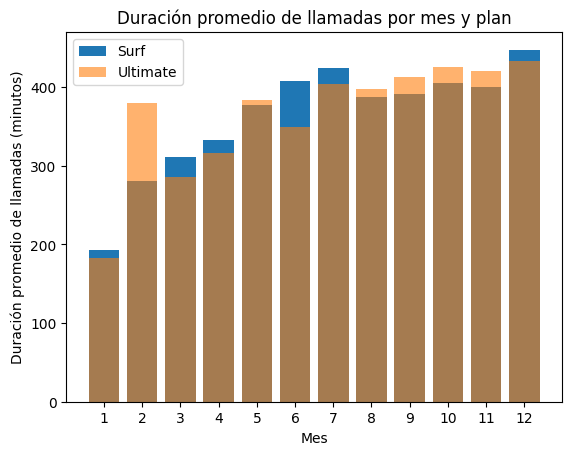

In [30]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
duracion_promedio_llamadas = usuario_consumo.groupby(["plan", "month"])["minutes"].mean().reset_index()

duracion_promedio_surf= duracion_promedio_llamadas.query("plan == 'surf'")
duracion_promedio_ultimate= duracion_promedio_llamadas.query("plan == 'ultimate'")

plt.bar(duracion_promedio_surf["month"], duracion_promedio_surf["minutes"], label="Surf")
plt.bar(duracion_promedio_ultimate["month"], duracion_promedio_ultimate["minutes"], label="Ultimate",alpha=0.6)
plt.xlabel("Mes")
plt.ylabel("Duración promedio de llamadas (minutos)")
plt.title("Duración promedio de llamadas por mes y plan")
plt.legend()
plt.xticks(duracion_promedio_llamadas["month"].unique())

plt.show()




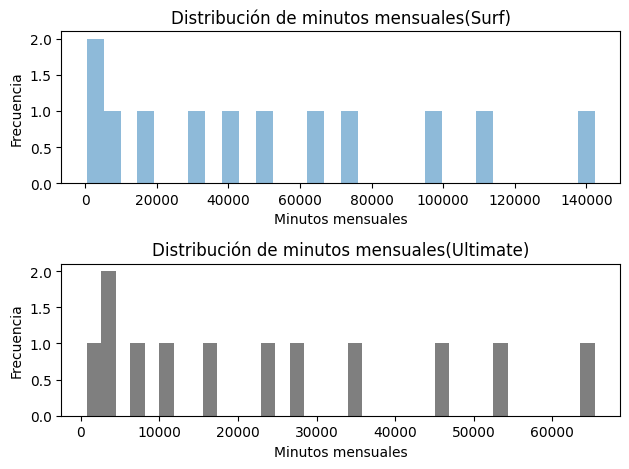

In [31]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
total_minutos_mensuales = usuario_consumo.groupby(["plan","month"])["minutes"].sum().reset_index()

total_minutos_mensuales_surf= total_minutos_mensuales.query("plan == 'surf'")
total_minutos_mensuales_ultimate= total_minutos_mensuales.query("plan == 'ultimate'")

# Use plt.subplot para apreciar la grafica para cada plan por separado
plt.subplot(2, 1, 1)
total_minutos_mensuales_surf["minutes"].plot(kind="hist",bins=30, alpha=0.5, label="Surf")
plt.xlabel("Minutos mensuales")
plt.ylabel("Frecuencia")
plt.title("Distribución de minutos mensuales(Surf)")


plt.subplot(2, 1, 2)
total_minutos_mensuales_ultimate["minutes"].plot(kind="hist",bins=35, alpha=0.5, label="Ultimate",color="black")
plt.xlabel("Minutos mensuales")
plt.ylabel("Frecuencia")
plt.title("Distribución de minutos mensuales(Ultimate)")


plt.tight_layout()# Esta fucion sirve para que no se empalme las graficas
plt.show()


In [32]:
# Calcula la media y la varianza de la duración mensual de llamadas.
print("Plan Surf:")
print("Media:", duracion_promedio_surf["minutes"].mean())
print("Varianza:", duracion_promedio_surf["minutes"].var())

print("\nPlan Ultimate:")
print("Media:", duracion_promedio_ultimate["minutes"].mean())
print("Varianza:", duracion_promedio_ultimate["minutes"].var())



Plan Surf:
Media: 363.06296730659636
Varianza: 5177.321155199246

Plan Ultimate:
Media: 365.97476208717234
Varianza: 5335.727136211307


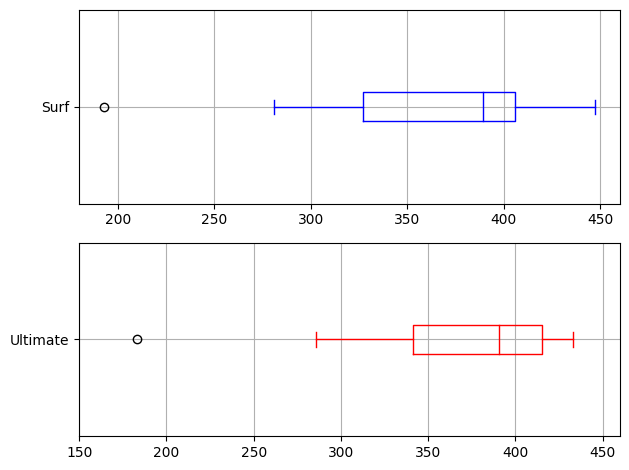

In [33]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
plt.subplot(2, 1, 1)
duracion_promedio_surf["minutes"].plot(kind="box", vert=False, color="blue", label="Surf",grid=True)

plt.subplot(2, 1, 2)
duracion_promedio_ultimate["minutes"].plot(kind="box", vert=False, color="red", label="Ultimate",xlim=(150, 460),grid=True)

plt.tight_layout()
plt.show()


**Conclusiones**

Se puede observar que el comportamiento con respecto a las llamadas es similar para los dos planes. En promedio el plan ultimate consume mas minutos por los usuarios pero tiene valores mas dispersos, es decir que hay veces que consume mucho menos y hay veces que consume mucho mas a diferencia del plan surf que tiene los valores mas centrados a la media.

### Mensajes

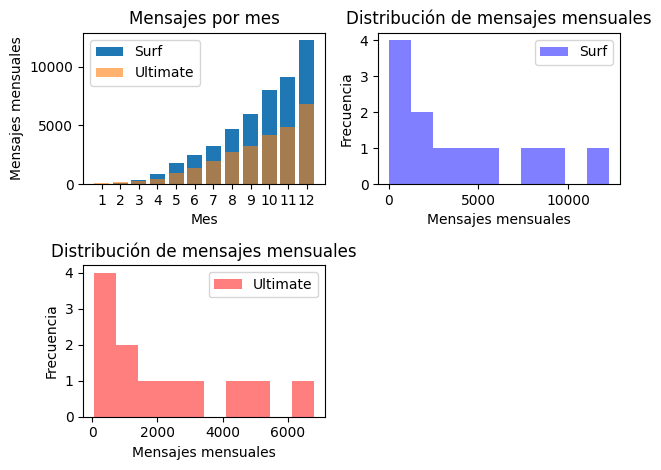

In [34]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
mensajes_por_usuario= usuario_consumo.groupby(["plan","month"])["messages"].sum().reset_index()

mensajes_por_usuario_surf= mensajes_por_usuario.query("plan == 'surf'")
mensajes_por_usuario_ultimate= mensajes_por_usuario.query("plan == 'ultimate'")

plt.subplot(221)
plt.bar(mensajes_por_usuario_surf["month"], mensajes_por_usuario_surf["messages"], label="Surf")
plt.bar(mensajes_por_usuario_ultimate["month"], mensajes_por_usuario_ultimate["messages"], label="Ultimate",alpha=0.6)
plt.xlabel("Mes")
plt.ylabel("Mensajes mensuales")
plt.title("Mensajes por mes")
plt.legend()
plt.xticks(mensajes_por_usuario["month"].unique())

plt.subplot(222)
plt.hist(mensajes_por_usuario_surf["messages"], bins=10, alpha=0.5, label="Surf",color="blue")
plt.xlabel("Mensajes mensuales")
plt.ylabel("Frecuencia")
plt.title("Distribución de mensajes mensuales")
plt.legend()

plt.subplot(223)
plt.hist(mensajes_por_usuario_ultimate["messages"], bins=10, alpha=0.5, label="Ultimate",color="red")
plt.xlabel("Mensajes mensuales")
plt.ylabel("Frecuencia")
plt.title("Distribución de mensajes mensuales")
plt.legend()

plt.tight_layout()
plt.show()



Plan Surf:
Media: 4084.5
Varianza: 16107218.090909092

Plan Ultimate:
Media: 2253.0833333333335
Varianza: 4699500.992424241



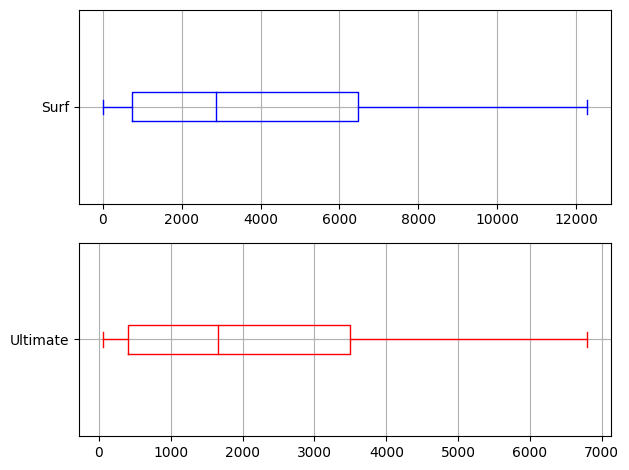

In [35]:
# Calcula la media y la varianza de envio mensual de mensajes.
print("Plan Surf:")
print("Media:", mensajes_por_usuario_surf["messages"].mean())
print("Varianza:", mensajes_por_usuario_surf["messages"].var())

print("\nPlan Ultimate:")
print("Media:", mensajes_por_usuario_ultimate["messages"].mean())
print("Varianza:", mensajes_por_usuario_ultimate["messages"].var())
print("")
# Diagramas de caja para visualizar la distribución de mensajes al mes

plt.subplot(2, 1, 1)
mensajes_por_usuario_surf["messages"].plot(kind="box", vert=False, color="blue", label="Surf",grid=True)

plt.subplot(2, 1, 2)
mensajes_por_usuario_ultimate["messages"].plot(kind="box", vert=False, color="red", label="Ultimate",grid=True)

plt.tight_layout()
plt.show()


**Conclusiones**

Sobre el comportamiento de los usuarios con respecto a los mensajes podemos ver claramente que hay mas mensajes enviados con el plan surf en total y por mes. Tambien podemos ver que los usuarios mes tras mes envian mas mensajes tanto como el plan surf como el plan ultimate pero el plan que predomina es el surf.

Hay que considerar que en nuestros datos hay mas usuarios con el plan surf.

### Internet

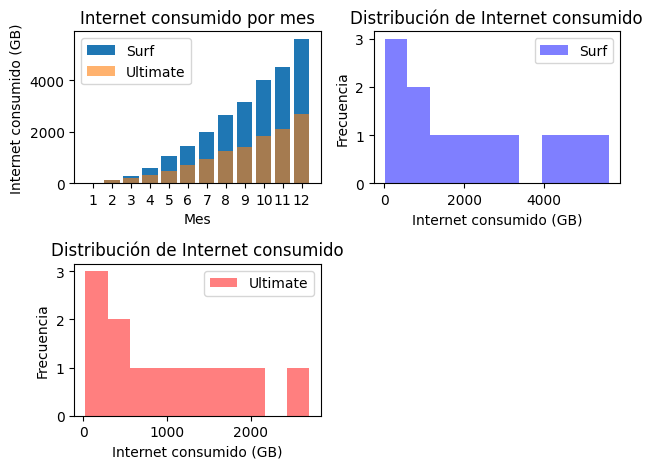

In [36]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
internet_por_usuario= usuario_consumo.groupby(["plan","month"])["mb_used"].sum().reset_index()
internet_por_usuario["mb_used"]= internet_por_usuario["mb_used"]/1024

internet_por_usuario_surf= internet_por_usuario.query("plan == 'surf'")
internet_por_usuario_ultimate= internet_por_usuario.query("plan == 'ultimate'")

plt.subplot(221)
plt.bar(internet_por_usuario_surf["month"], internet_por_usuario_surf["mb_used"], label="Surf")
plt.bar(internet_por_usuario_ultimate["month"], internet_por_usuario_ultimate["mb_used"], label="Ultimate",alpha=0.6)
plt.xlabel("Mes")
plt.ylabel("Internet consumido (GB)")
plt.title("Internet consumido por mes")
plt.legend()
plt.xticks(internet_por_usuario["month"].unique())

plt.subplot(222)
plt.hist(internet_por_usuario_surf["mb_used"], bins=10, alpha=0.5, label="Surf",color="blue")
plt.xlabel("Internet consumido (GB)")
plt.ylabel("Frecuencia")
plt.title("Distribución de Internet consumido")
plt.legend()

plt.subplot(223)
plt.hist(internet_por_usuario_ultimate["mb_used"], bins=10, alpha=0.5, label="Ultimate",color="red")
plt.xlabel("Internet consumido (GB)")
plt.ylabel("Frecuencia")
plt.title("Distribución de Internet consumido")
plt.legend()

plt.tight_layout()
plt.show()

Plan Surf:
Media: 2119.643548990885
Varianza: 3523070.5525748045

Plan Ultimate:
Media: 1008.673810221354
Varianza: 746303.2085918416



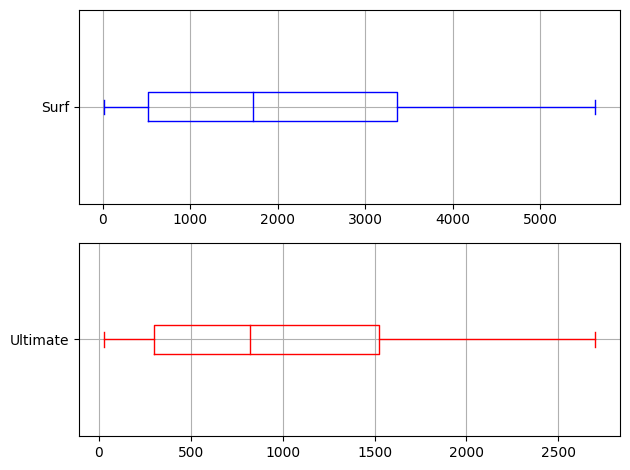

In [37]:
# Calcula la media y la varianza del tráfico de Internet consumido por usuarios por plan
print("Plan Surf:")
print("Media:", internet_por_usuario_surf["mb_used"].mean())
print("Varianza:", internet_por_usuario_surf["mb_used"].var())

print("\nPlan Ultimate:")
print("Media:", internet_por_usuario_ultimate["mb_used"].mean())
print("Varianza:", internet_por_usuario_ultimate["mb_used"].var())
print("")
# Diagramas de caja para visualizar la distribución del tráfico de Internet consumido por usuarios por plan
plt.subplot(2, 1, 1)
internet_por_usuario_surf["mb_used"].plot(kind="box", vert=False, color="blue", label="Surf",grid=True)

plt.subplot(2, 1, 2)
internet_por_usuario_ultimate["mb_used"].plot(kind="box", vert=False, color="red", label="Ultimate",grid=True)

plt.tight_layout()
plt.show()


**Conclusiones**

Aqui es el mismo caso como el de mensajes, mes tras mes va aumentando el consumo de datos para ambos planes pero el que predomina es el plan surf, talves sea porque hay mas usuarios en el plan surf.

## Ingreso

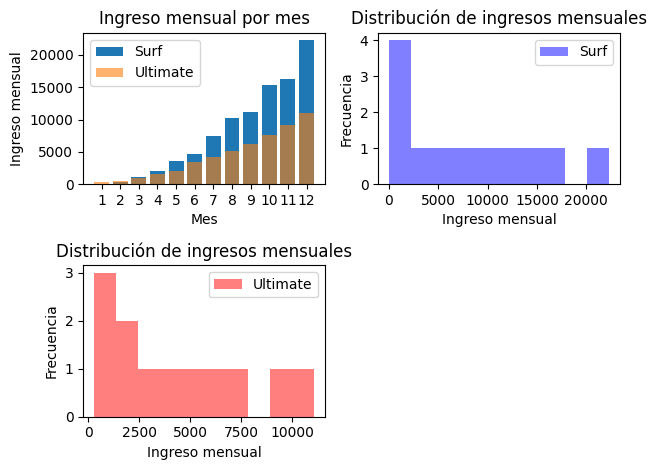

In [38]:
ingreso_mensual_por_plan= usuario_consumo.groupby(["plan","month"])["tarifa_mensual"].sum().reset_index()

ingreso_mensual_surf= ingreso_mensual_por_plan.query("plan == 'surf'")
ingreso_mensual_ultimate= ingreso_mensual_por_plan.query("plan == 'ultimate'")

plt.subplot(221)
plt.bar(ingreso_mensual_surf["month"], ingreso_mensual_surf["tarifa_mensual"], label="Surf")
plt.bar(ingreso_mensual_ultimate["month"], ingreso_mensual_ultimate["tarifa_mensual"], label="Ultimate",alpha=0.6)
plt.xlabel("Mes")
plt.ylabel("Ingreso mensual")
plt.title("Ingreso mensual por mes")
plt.legend()
plt.xticks(ingreso_mensual_por_plan["month"].unique())

plt.subplot(222)
plt.hist(ingreso_mensual_surf["tarifa_mensual"], bins=10, alpha=0.5, label="Surf",color="blue")
plt.xlabel("Ingreso mensual")
plt.ylabel("Frecuencia")
plt.title("Distribución de ingresos mensuales")
plt.legend()

plt.subplot(223)
plt.hist(ingreso_mensual_ultimate["tarifa_mensual"], bins=10, alpha=0.5, label="Ultimate",color="red")
plt.xlabel("Ingreso mensual")
plt.ylabel("Frecuencia")
plt.title("Distribución de ingresos mensuales")
plt.legend()

plt.tight_layout()
plt.show()


Plan Surf:
Media: 7907.909633333334
Varianza: 52760292.5511724

Plan Ultimate:
Media: 4338.833333333333
Varianza: 12764516.333333336



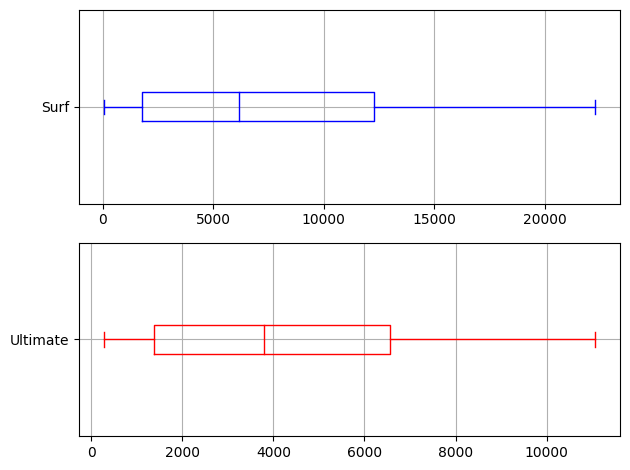

In [39]:
# Calcula la media y la varianza del tráfico de Internet consumido por usuarios por plan
print("Plan Surf:")
print("Media:", ingreso_mensual_surf["tarifa_mensual"].mean())
print("Varianza:", ingreso_mensual_surf["tarifa_mensual"].var())

print("\nPlan Ultimate:")
print("Media:", ingreso_mensual_ultimate["tarifa_mensual"].mean())
print("Varianza:", ingreso_mensual_ultimate["tarifa_mensual"].var())
print("")
# Diagramas de caja para visualizar la distribución del tráfico de Internet consumido por usuarios por plan
plt.subplot(2, 1, 1)
ingreso_mensual_surf["tarifa_mensual"].plot(kind="box", vert=False, color="blue", label="Surf",grid=True)

plt.subplot(2, 1, 2)
ingreso_mensual_ultimate["tarifa_mensual"].plot(kind="box", vert=False, color="red", label="Ultimate",grid=True)

plt.tight_layout()
plt.show()



**Conclusiones**

Claramente hay mas ingresos con el plan surf.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Excelente elección para las visualizaciones de datos. Además, calculaste correctamente la información estadística de cada distribución de datos, tanto para el consumo de minutos, mensajes e internet, como para los ingresos asociados a los cobros mensuales en cada plan. Esto permite identificar patrones de comportamiento en los usuarios y extraer información valiosa para la compañía.

</div>

## Prueba las hipótesis estadísticas

In [40]:
#Hipotesis nula: Los ingresos promedio de los usuarios de los planes Ultimate y Surf son iguales.
#Hipotesis alternativa: Los ingresos promedio de los usuarios de los planes Ultimate y Surf son diferentes.
# Prueba las hipótesis

alpha=0.05

plan_surf = usuario_consumo[usuario_consumo["plan"] == "surf"]["tarifa_mensual"]
plan_ultimate = usuario_consumo[usuario_consumo["plan"] == "ultimate"]["tarifa_mensual"]

# Realiza la prueba t de Student
results = st.ttest_ind(plan_surf,plan_ultimate,equal_var=False)

print('valor p:', results.pvalue)

if results.pvalue < alpha:
  print("Rechazar la hipótesis nula: Los ingresos promedio de los usuarios de los planes Ultimate y Surf son diferentes.")
else:
  print("No rechazar la hipótesis nula")



valor p: 3.5320199509520717e-16
Rechazar la hipótesis nula: Los ingresos promedio de los usuarios de los planes Ultimate y Surf son diferentes.


In [41]:
#Agrege la columna city al DataFrame usuario_consumo
columns= ["user_id","month","calls","minutes","messages","mb_used","plan","tarifa_mensual","city"]
usuario_consumo= usuario_consumo.merge(users[["user_id", "city"]], on="user_id", how="left")[columns]

In [42]:
# Hipotesis nula: El ingreso promedio de los usuarios del área NY-NJ es igual al de los usuarios de otras regiones.
# Hipotesis alternativa: El ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.
# Prueba las hipótesis

alpha = 0.05


ingreso_nynj = usuario_consumo[usuario_consumo['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']['tarifa_mensual']
ingreso_otras_regiones = usuario_consumo[usuario_consumo['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']['tarifa_mensual']

# Realiza la prueba t de Student
results = st.ttest_ind(ingreso_nynj, ingreso_otras_regiones)

print('valor p:', results.pvalue)

if results.pvalue < alpha:
    print("Rechazar la hipótesis nula: El ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.")
else:
    print("No rechazar la hipótesis nula: No hay suficiente evidencia para decir que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.")



valor p: 0.04073944362703139
Rechazar la hipótesis nula: El ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Edgar aplicaste correctamente las pruebas de hipótesis comparando la distribución de dos muestras independientes e interpretando de manera acertada el *p-value* obtenido y su relación con la hipótesis nula

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Te recomiendo realizar previamente una prueba de  [Levene](https://www.educaopen.com/digital-lab/blog/educacion-digital/prueba-de-levene) para evaluar la igualdad de las varianzas, lo que te permitirá configurar adecuadamente el parámetro **equal_var** en la función `ttest_ind`. Esto te brindará una interpretación más precisa de los resultados además garantizará que la prueba t sea estadísticamente válida.

</div>
</div>

## Conclusión general

En este proyecto resalta la importancia de la preparacion de los datos para despues poder analizarlos con estudios estadisticos y expresarlos mejor con graficas. Tambien con los datos preparados podemos obtener probabilidades de igualdades de ingresos entre planes o entre usuarios por decir algunos ejemplos.

En este proyecto me enseño como graficar varias graficas en el mismo codigo usando la funcion subplot de la libreria matplotlib que creo que es una funcion muy oportuna al momento de querer demostrar varias graficas de la misma informacion.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Has logrado reconocer con claridad cómo una preparación cuidadosa de los datos facilita la aplicación de métodos estadísticos y el uso efectivo de visualizaciones para comunicar hallazgos. 

</div>